# AG1

## Torres de hanoi - divide y vencerás

In [73]:
def hanoi_towers(chips, origin, middle, dest):
    if chips == 1:
        print('Lleva la ficha desde %s hasta %s' % (origin, dest))
    else:
        hanoi_towers(chips-1, origin, dest, middle)
        print('Lleva la ficha desde %s hasta %s' % (origin, dest))
        hanoi_towers(chips-1, middle, origin, dest)

hanoi_towers(3, "A", "B", "C")

Lleva la ficha desde A hasta C
Lleva la ficha desde A hasta B
Lleva la ficha desde C hasta B
Lleva la ficha desde A hasta C
Lleva la ficha desde B hasta A
Lleva la ficha desde B hasta C
Lleva la ficha desde A hasta C


## Cambio de monedas - voraz

In [74]:
def money_change(n, ms):
    result = [0]*len(ms)
    acum = 0

    i = 0
    while acum != n:
        coins = (n - acum)//ms[i]
        result[i] = coins
        acum = acum + coins * ms[i]
        i += 1

    return result

money_change(99, [100, 25, 10, 5, 1])   

[0, 3, 2, 0, 4]

## Problema de las 4 reinas - backtracking

In [107]:
def pretty(s):
    n = len(s)
    for x in range(n):
        print('')
        for i in range(n):
            print(' %s ' % ('X' if s[i] == x + 1 else '-'), end='')


def maybe(sol, epoch):
    for i in range(epoch + 1):
        if sol.count(sol[i]) > 1:
            return False
        
        for j in range(i + 1, epoch + 1):
            if abs(i-j) == abs(sol[i] - sol[j]):
                return False

    return True


def queens(size, sol=[], epoch=0):
    if len(sol) == 0:
        sol = [0]*size

    for i in range (1, size + 1):
        sol[epoch] = i
        if maybe(sol, epoch):
            if epoch == size - 1:
                print(sol)
                pretty(sol)
                print('\n')
            else:
                queens(size, sol, epoch + 1)

    sol[epoch] = 0

queens(4)

[2, 4, 1, 3]

 -  -  X  - 
 X  -  -  - 
 -  -  -  X 
 -  X  -  - 

[3, 1, 4, 2]

 -  X  -  - 
 -  -  -  X 
 X  -  -  - 
 -  -  X  - 



## Los puntos más cercanos - fuerza bruta

Complejidad: 7 + n*(3 + 1 + 1 + 2) + 1 = 8 + n*7 = $O(n)$

In [2]:
import numpy as np

def nearest_point_1d(target, points):
    n = points[0] # 1 + 1 = 2
    ndif = abs(target - n) # 1 + 1 + 1 = 3
    for i in range(1, len(points)): # (1 + n) + (1 + n) = n + 2
        nn = abs(target - points[i]) # 1 + 1 + 1 = 3
        if nn < ndif: # 1
            ndif = nn # 1
            n = points[i] # 1 + 1 = 2

    return n # 1

arr = np.random.random(10)
print(arr)
nearest_point_1d(0.1, arr)

[0.02097653 0.21041056 0.45486978 0.79509784 0.24387506 0.05688649
 0.43926118 0.80706256 0.27158801 0.92529794]


0.05688649081256192

## Los puntos más cercanos - divide y vencerás (1D)

In [21]:
def nearest_point_dyv(target, points):
    arr = np.array_split(points, 2)
    if len(arr[1]) == 0:
        return points[0]

    dist1 = abs(target - arr[0][-1])
    dist2 = abs(target - arr[1][0])

    return nearest_point_dyv(target,
        arr[1] if dist2 < dist1 else arr[0])


arr = np.random.random(1000000)
arr = np.sort(arr)
print(arr)
nearest_point_dyv(0.3, arr)

[1.22669123e-06 2.90191050e-06 3.70549753e-06 ... 9.99998425e-01
 9.99998532e-01 9.99999292e-01]


0.3000001948316021

## Los puntos más cercanos (Multidimensión) - divide y vencerás (2D)


Nearest point: [0.49879536 0.50122051]


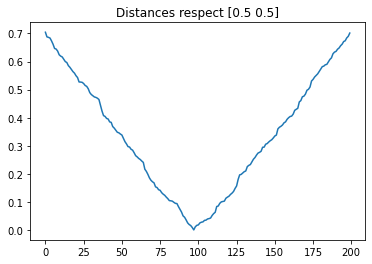

In [56]:
import matplotlib.pyplot as plt

def distance(point1, point2):
    return np.linalg.norm(point1 - point2)


def nearest_point_dyv_m(target, points):
    arr = np.array_split(points, 2)
    if len(arr[1]) == 0:
        return points[0]

    dist1 = distance(target, arr[0][-1])
    dist2 = distance(target, arr[1][0])

    return nearest_point_dyv_m(target,
        arr[1] if dist2 < dist1 else arr[0])


arr = np.random.rand(200, 2)
arr = np.sort(arr, axis=0)
target = np.array([0.5, 0.5])
c = list(map(lambda x: distance(target, x), arr))

plt.plot(c)
plt.title('Distances respect {}'.format(target))
print('\nNearest point: {}'.format(nearest_point_dyv_m(target, arr)))

## Los puntos más cercanos (Multidimensión) - divide y vencerás (3D)


Nearest point: [0.48889899 0.51883827 0.53355589]


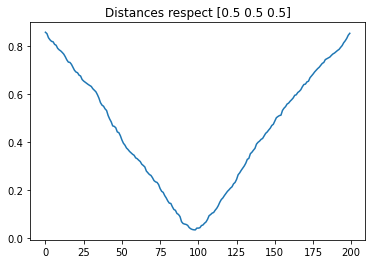

In [57]:
arr = np.random.rand(200, 3)
arr = np.sort(arr, axis=0)
target = np.array([0.5, 0.5, 0.5])
c = list(map(lambda x: distance(target, x), arr))

plt.plot(c)
plt.title('Distances respect {}'.format(target))
print('\nNearest point: {}'.format(nearest_point_dyv_m(target, arr)))